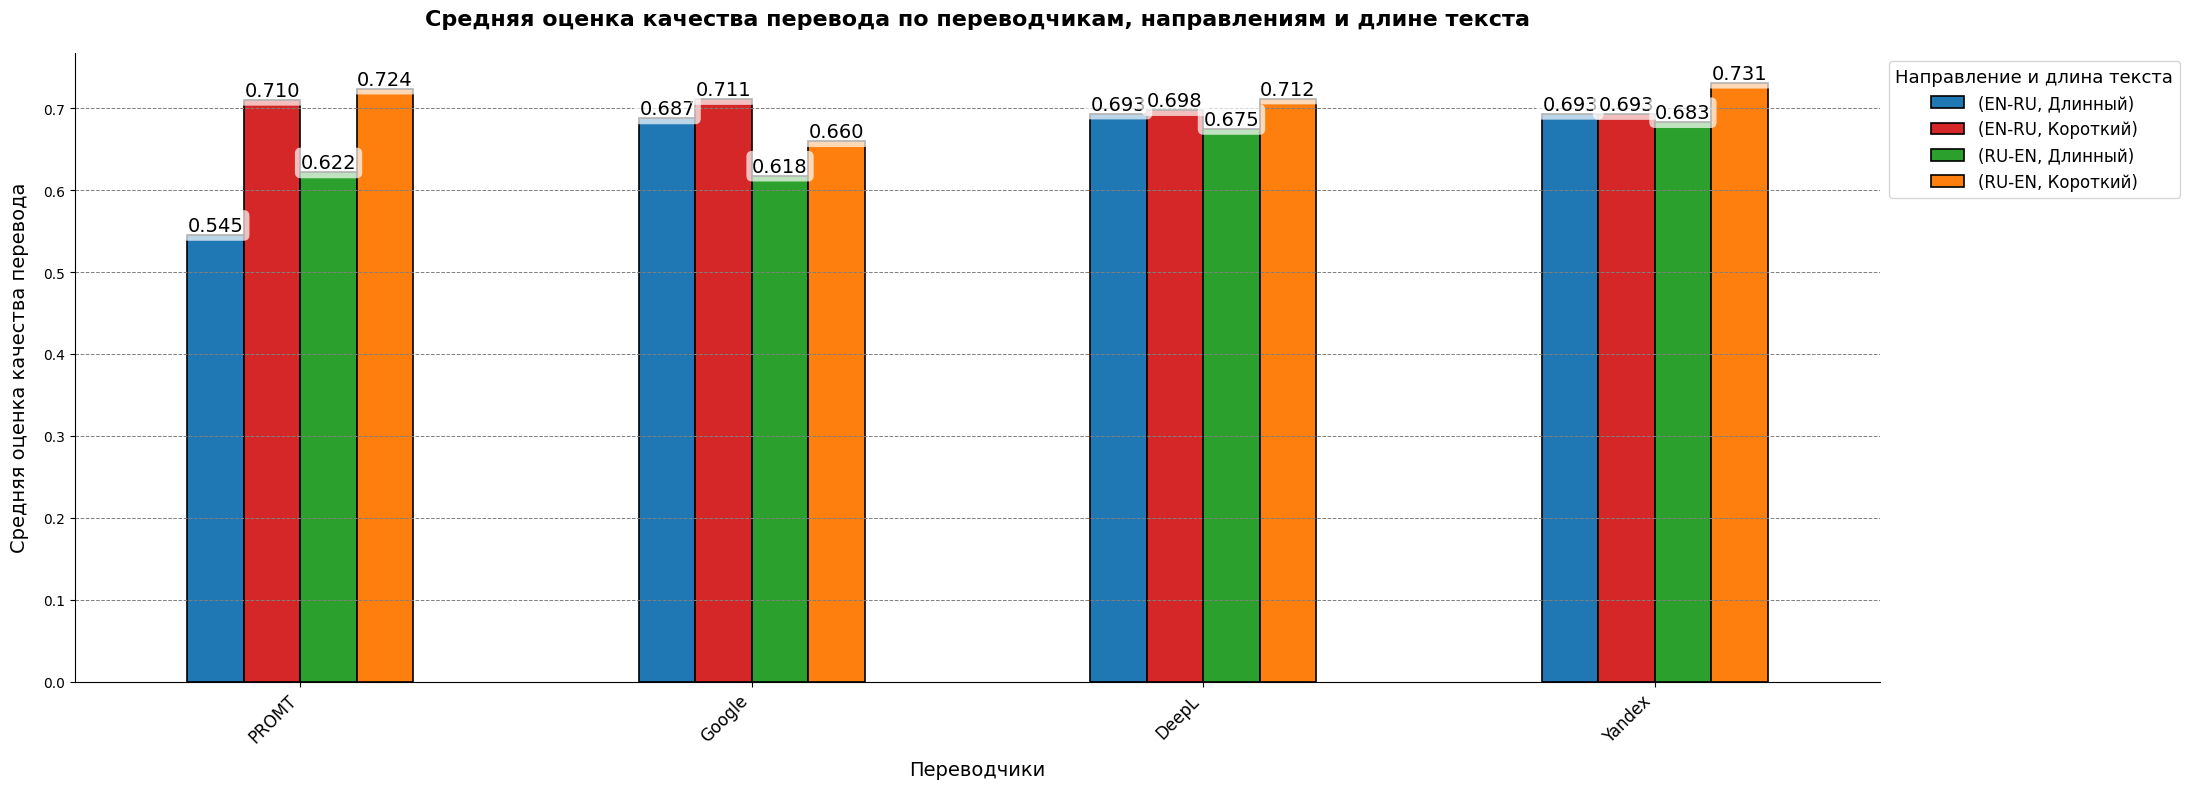


Средняя оценка качества перевода по переводчикам, направлениям и длине текста:

PROMT, ('EN-RU', 'Длинный'): 0.545
PROMT, ('EN-RU', 'Короткий'): 0.710
PROMT, ('RU-EN', 'Длинный'): 0.622
PROMT, ('RU-EN', 'Короткий'): 0.724
Google, ('EN-RU', 'Длинный'): 0.687
Google, ('EN-RU', 'Короткий'): 0.711
Google, ('RU-EN', 'Длинный'): 0.618
Google, ('RU-EN', 'Короткий'): 0.660
DeepL, ('EN-RU', 'Длинный'): 0.693
DeepL, ('EN-RU', 'Короткий'): 0.698
DeepL, ('RU-EN', 'Длинный'): 0.675
DeepL, ('RU-EN', 'Короткий'): 0.712
Yandex, ('EN-RU', 'Длинный'): 0.693
Yandex, ('EN-RU', 'Короткий'): 0.693
Yandex, ('RU-EN', 'Длинный'): 0.683
Yandex, ('RU-EN', 'Короткий'): 0.731


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных из CSV
df = pd.read_csv("data.csv")

# Группируем по переводчикам, направлениям перевода и длине текста, вычисляя средние оценки
translator_scores = df.groupby(['Переводчик', 'Направление перевода', 'Длина текста'])['Оценка качества перевода'].mean().unstack([1, 2])

# Рассчитаем среднее по всем направлениям и длинам, и отсортируем переводчиков по возрастанию
translator_scores['Среднее'] = translator_scores.mean(axis=1)
translator_scores = translator_scores.sort_values(by='Среднее').drop(columns=['Среднее'])

# Построение комбинированной столбчатой диаграммы
fig, ax = plt.subplots(figsize=(22, 8))
colors = ['#1f77b4', '#d62728', '#2ca02c', '#ff7f0e']  # Синий, красный, зеленый, оранжевый
bars = translator_scores.plot(kind='bar', ax=ax, edgecolor='black', linewidth=1.2, color=colors)

# Добавим значения над каждым столбцом с обводкой для лучшей видимости
for bar in bars.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.3f}", ha='center', va='bottom', fontsize=14, color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

# Настройка графика
ax.set_xlabel('Переводчики', fontsize=14, labelpad=10)
ax.set_ylabel('Средняя оценка качества перевода', fontsize=14, labelpad=10)
ax.set_title('Средняя оценка качества перевода по переводчикам, направлениям и длине текста', fontsize=16, fontweight='bold', pad=20)
ax.set_xticklabels(translator_scores.index, rotation=45, ha='right', fontsize=12)
ax.legend(title="Направление и длина текста", loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, title_fontsize='13')

# Убираем верхнюю и правую границы графика
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Добавляем сетку по оси y
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, color='gray')
ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

# Вывод текстовых данных под графиком
print("\nСредняя оценка качества перевода по переводчикам, направлениям и длине текста:\n")
for translator in translator_scores.index:
    scores = translator_scores.loc[translator]
    for col in scores.index:
        print(f"{translator}, {col}: {scores[col]:.3f}")
